<a href="https://colab.research.google.com/github/thanhnhan311201/CS114.L11.KHCL/blob/master/ImageClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving HandWritenCharacter.rar to HandWritenCharacter.rar


In [3]:
!pip install patool

     |████████████████████████████████| 81kB 7.1MB/s 


In [4]:
import patoolib
patoolib.extract_archive('/content/HandWritenCharacter.rar')

patool: Extracting /content/HandWritenCharacter.rar ...
patool: running /usr/bin/unrar x -- /content/HandWritenCharacter.rar
patool:     with cwd='./Unpack_lhzvgn6l'
patool: ... /content/HandWritenCharacter.rar extracted to `Anhcat'.


'Anhcat'

In [7]:
folder = '/content/HandWritenCharacter'


In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.metrics import silhouette_score
import glob, shutil
import tensorflow as tf

In [9]:
L = os.listdir(folder)

In [10]:
FJoin = os.path.join

In [11]:
print(len(L))

3420


In [33]:
Bad_img = open('/content/Bad_img.txt', 'r')

In [34]:
bad = Bad_img.readlines()
Bad_img.close()

In [36]:
bad = [line.rstrip('\n') for line in bad]
print(bad)

['/content/HandWritenCharacter/524.jpg', '/content/HandWritenCharacter/1475.jpg', '/content/HandWritenCharacter/1418.jpg', '/content/HandWritenCharacter/1493.jpg', '/content/HandWritenCharacter/1510.jpg', '/content/HandWritenCharacter/2302.jpg', '/content/HandWritenCharacter/2679.jpg', '/content/HandWritenCharacter/3404.jpg', '/content/HandWritenCharacter/2896.jpg', '/content/HandWritenCharacter/2673.jpg', '/content/HandWritenCharacter/2295.jpg', '/content/HandWritenCharacter/2572.jpg', '/content/HandWritenCharacter/2898.jpg', '/content/HandWritenCharacter/2555.jpg', '/content/HandWritenCharacter/2654.jpg', '/content/HandWritenCharacter/3036.jpg', '/content/HandWritenCharacter/2626.jpg', '/content/HandWritenCharacter/2936.jpg', '/content/HandWritenCharacter/2617.jpg', '/content/HandWritenCharacter/3388.jpg', '/content/HandWritenCharacter/2246.jpg', '/content/HandWritenCharacter/2589.jpg', '/content/HandWritenCharacter/2575.jpg', '/content/HandWritenCharacter/3413.jpg', '/content/HandWr

In [40]:
list_image = [FJoin(folder, img) for img in L if FJoin(folder, img) not in bad]

In [41]:
print(len(list_image))

2805


In [42]:
for img_link in list_image:
    img = cv2.imread(img_link)
    grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(img_link, grayscale)

In [60]:
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from skimage.feature import hog
from sklearn.decomposition import PCA

In [62]:
list_feature = []
for img_link in list_image:
    img = cv2.imread(img_link)
    feature = hog(img, orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualize=False, multichannel=True)
    list_feature.append(feature)

In [64]:
print(list_feature[0].shape)

(5800,)


In [65]:
X = np.array(list_feature)

In [66]:
print(X.shape)

(2805, 5800)


In [71]:
pca = PCA(n_components= 100)
X = pca.fit_transform(X)

In [74]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [75]:
kmeans.labels_

array([20, 24, 13, ..., 20, 22, 20], dtype=int32)

In [76]:
group = {}
index = 0
for link_img in list_image:
    if labels[index] not in group.keys():
        group[labels[index]] = []
        group[labels[index]].append(link_img) 
    else:
        group[labels[index]].append(link_img) 
    index += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


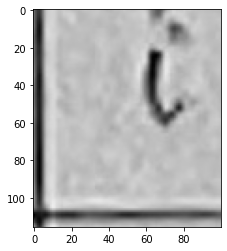

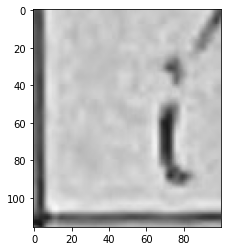

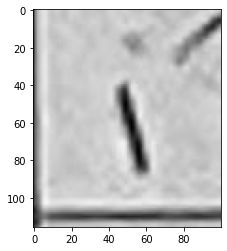

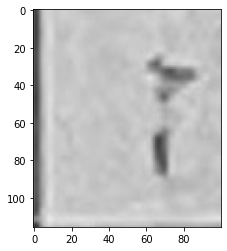

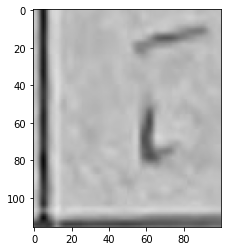

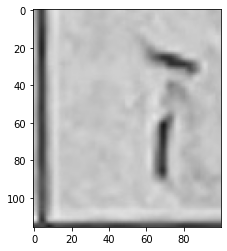

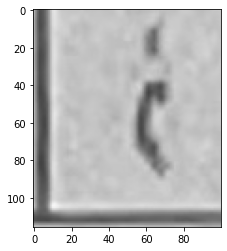

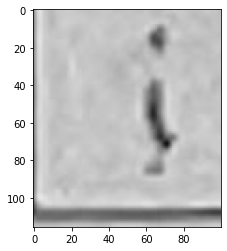

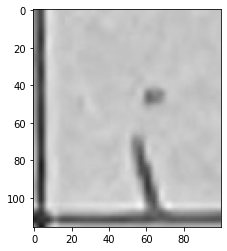

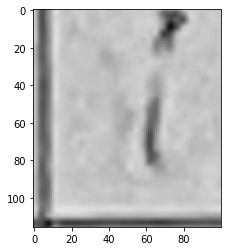

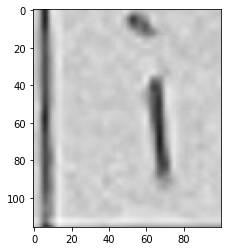

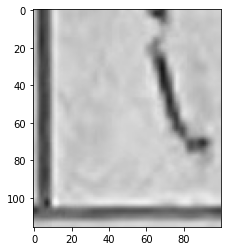

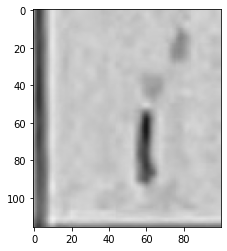

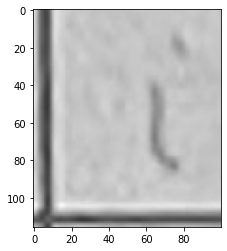

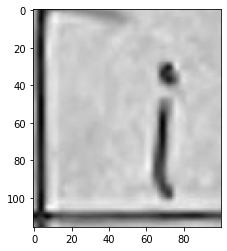

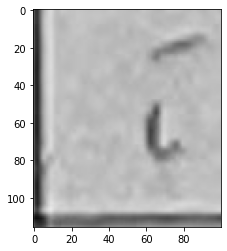

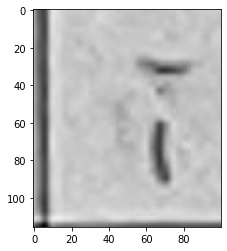

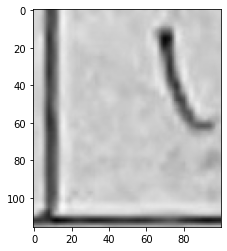

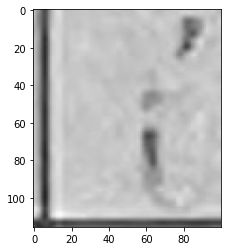

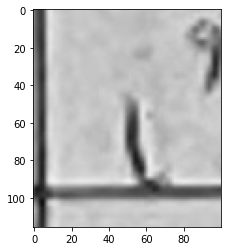

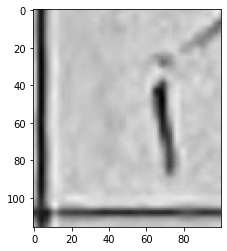

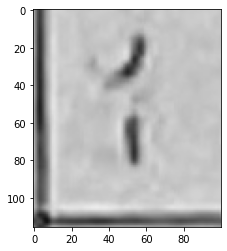

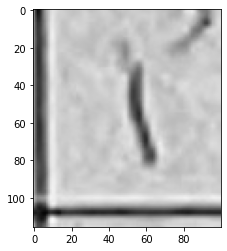

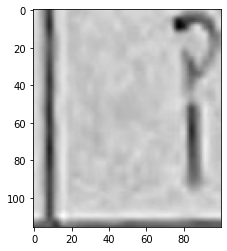

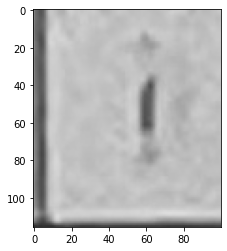

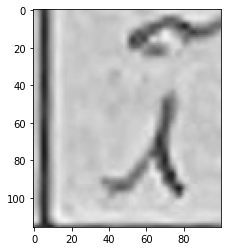

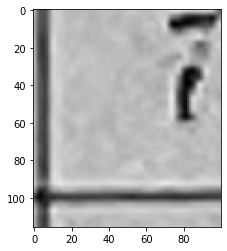

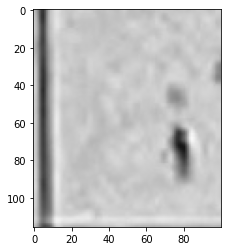

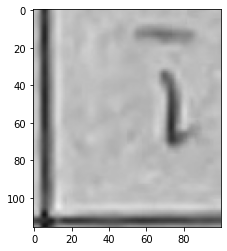

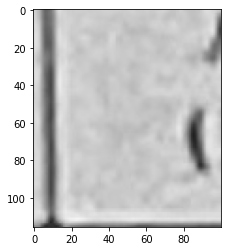

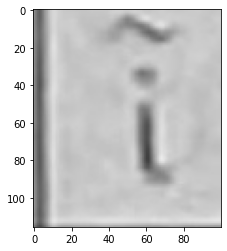

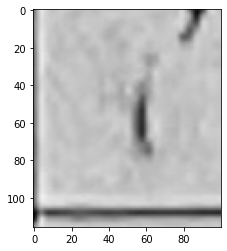

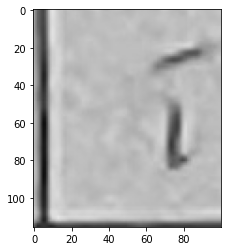

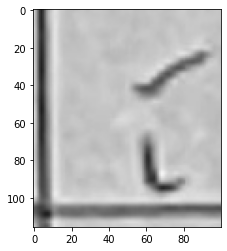

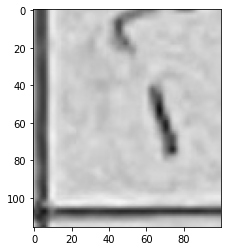

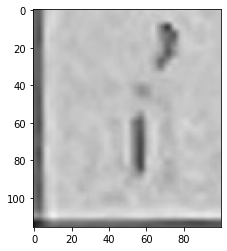

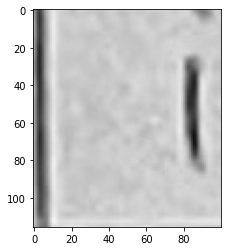

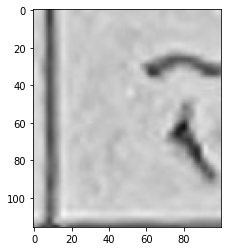

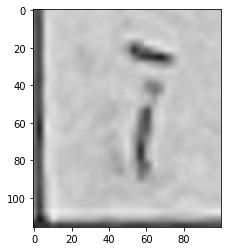

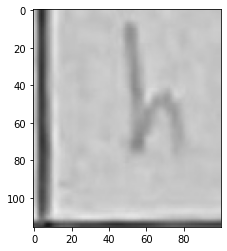

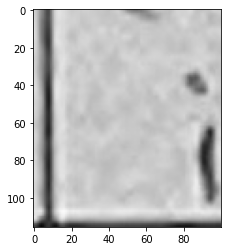

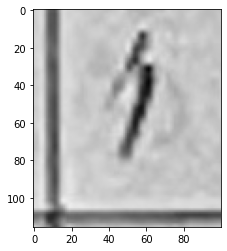

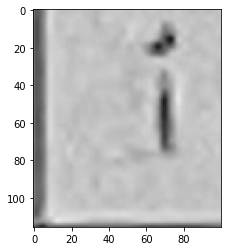

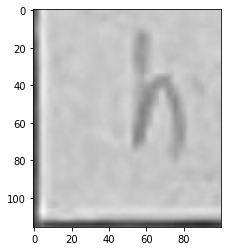

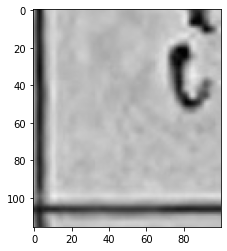

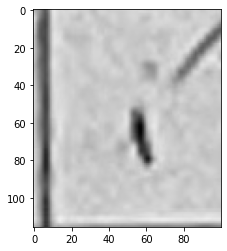

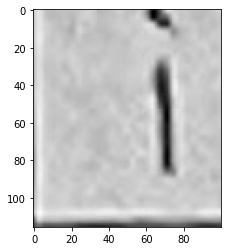

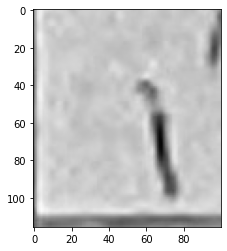

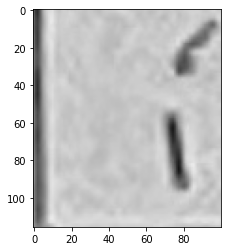

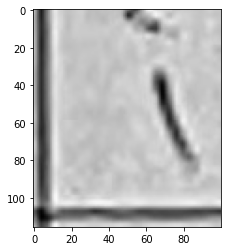

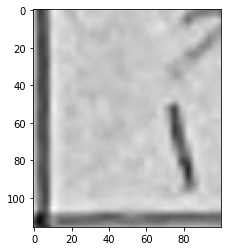

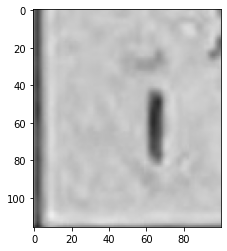

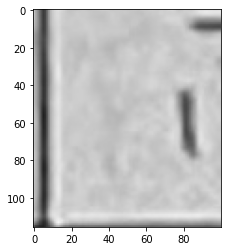

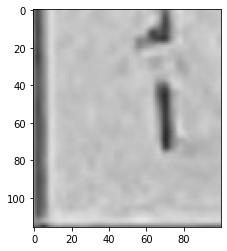

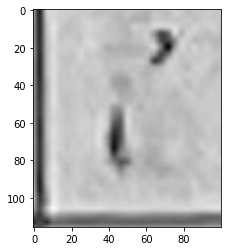

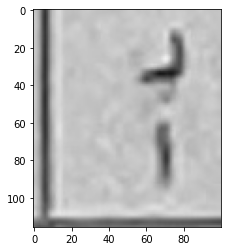

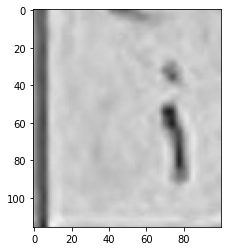

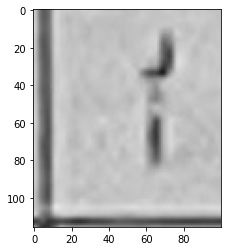

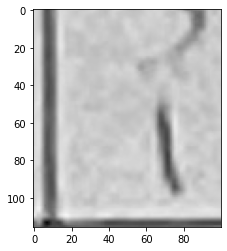

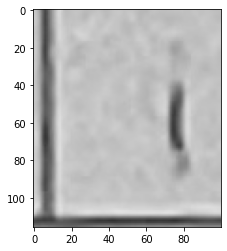

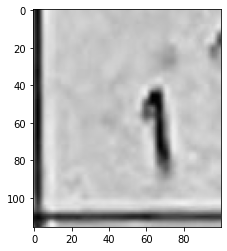

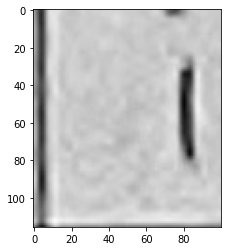

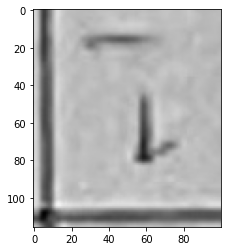

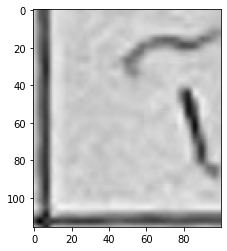

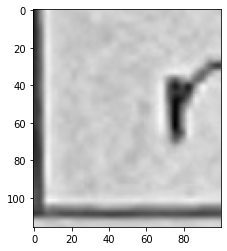

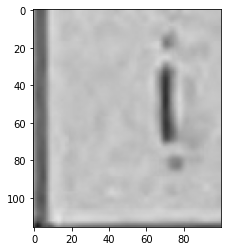

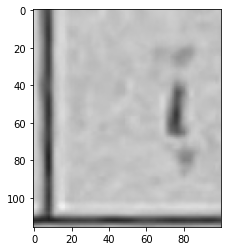

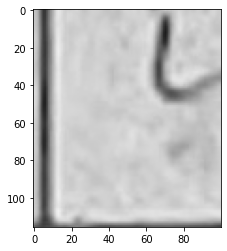

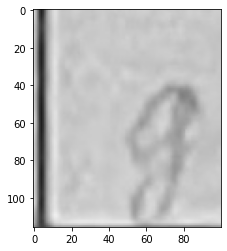

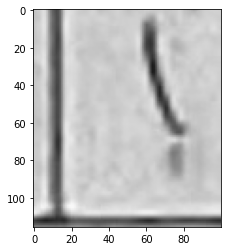

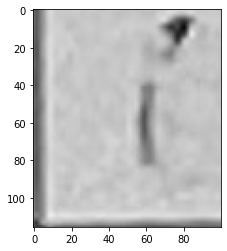

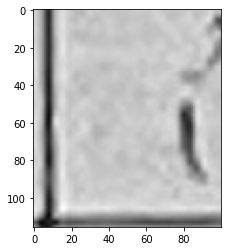

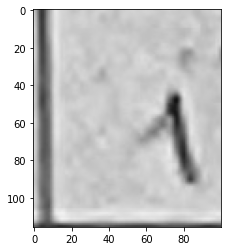

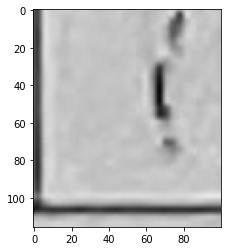

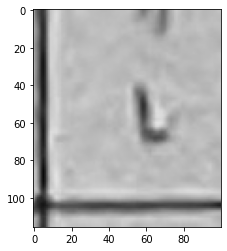

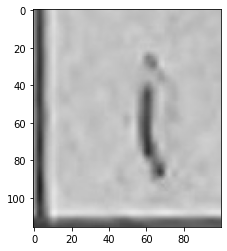

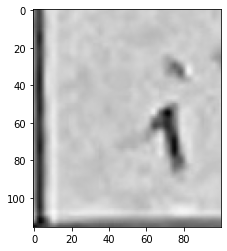

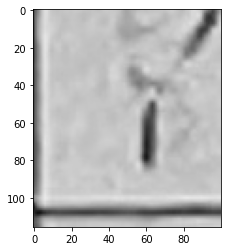

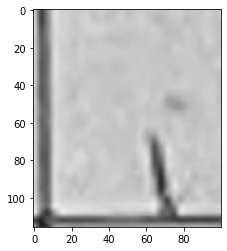

In [77]:
for img_link in group[0]:
    img = cv2.imread(img_link)
    plt.figure()
    plt.imshow(img)